# Demonstrations of RADARSAT-1 Sample Functions

This Jupyter Notebook contains sample outputs for many of the functions in the GitHub repo, as well as brief demonstrations of how the results can be used.

## get_metadata.py

This file contains several functions for downloading metadata for images without downloading the image itself. Data is then returned as a Pandas DataFrame and can also be output as a CSV if desired.

### Running the Scripts

In [1]:
import get_metadata as gm
import pandas as pd

In [2]:
# Sample call to retrieve data from March 1997 without converting the output to a CSV.
print("Getting data from March 1997:")
df = gm.get_data_from_month_and_year(1997, 3, to_csv=False)

Getting data from March 1997:
1997/3/


In [8]:
# Sample call to retrieve data from October 2007 to February 2008 and output a CSV with it
print("Getting data between October 2008 and February 2009:")
df2 = gm.get_data_from_date_range(2007, 8, 2008, 2, to_csv=True)

Getting data between October 2008 and February 2009:
2007/8/
2007/9/
2007/10/
2007/11/
2007/12/
2008/1/
2008/2/


In [5]:
# Sample call to retrieve metadata for a country (takes a long time, as it has to check all imagery)
print("Getting data for all imagery of Mexico")
df3 = gm.get_data_by_country('Mexico', to_csv=False)
print("Finished getting the data")

Getting data for all imagery of Mexico
Finished getting the data


In [4]:
# Sample call to retrieve metadata for a known file (2007/8/RS1_M0620349_SCNA_20070825_020117_HH_SCN.tif)
print("Retrieving data for the file 2007/8/RS1_M0620349_SCNA_20070825_020117_HH_SCN.tif")
df4 = gm.get_data_from_filename('2007/8/RS1_M0620349_SCNA_20070825_020117_HH_SCN.tif', to_csv=False)

Retrieving data for the file 2007/8/RS1_M0620349_SCNA_20070825_020117_HH_SCN.tif


In [ ]:
# Sample call to retrieve all the metadata where the attribute "orbit-direction" is equal to "ascending"
print("Collecting data where 'orbit-direction' is equal to 'ascending'")
df5 = gm.get_data_for_attribute('orbit-direction', 'ascending', to_csv=False)

### Uses for the scripts

The metadata for the images has a variety of uses, such as allowing to find imagery by date, by location, or even by the sensor mode from the satellite. Since the data is returned as a Dataframe, there's a wide variety of analysis possible.

Some sample code using the metadata can be found in the sample_algorithms.py file as well.

#### Finding amount of imagery per month

In [2]:
import matplotlib.pyplot as plt

dates_dict = {}

for full_date in df2["start-date"]:
    month = full_date.split('-')[1]
    year = full_date.split('-')[0]
    
    if month + '-' + year in dates_dict:
        dates_dict[month + '-' + year] += 1
    else:
        dates_dict[month + '-' + year] = 1
        
plt.plot(list(dates_dict.keys()), list(dates_dict.values()), marker='o')
plt.show()

NameError: name 'df2' is not defined

## downloading_files.py

This file contains several functions for downloading images. Images are downloaded in a GeoTIFF format, which allows them to be viewed in QGIS or other geospatial tools. **Note:** These files can be large, normally ranging from 150 - 600 MB. Make sure you have storage space appropriate for them. It can also take a long time to download them, especially if a large number of images is being downloaded.

### Running the scripts

In [10]:
import downloading_files as dwnld

In [ ]:
# Sample call to download 4 images from March 1998
dwnld.download_directory(1998, 3, 4)

In [ ]:
# Sample call to download all files from the RADARSAT-1 bucket (takes a long time and will take MASSIVE amounts of storage)
# dwnld.download_all()

In [ ]:
# Sample call to download a known file
dwnld.download_file('2007/8/RS1_M0620349_SCNA_20070825_020117_HH_SCN.tif')

In [ ]:
# Sample call to download the first 3 images of Canada.
dwnld.download_by_country('Canada', 3)

In [ ]:
# Sample call to download 2 images of the coordinates (46.3, -79.7)
dwnld.download_by_coordinates(46.3, -79.7, 2)

Files downloaded by these scripts will be placed into folders by year / month. For example, all files from August 2009 will be placed into a 2009/8/ directory.

## sample_algorithms.py

This file contains several functions to showcase possible tasks performed with R-1 imagery or metadata.

### Running the scripts

In [3]:
import sample_algorithms as sa

#### create_a_map(start_year, start_month, end_year, end_month)

This script will create a map showing the location of imagery during a given period.

In [3]:
# Sample call to create maps showing the coverage from September 1999 to June 2000
sa.create_a_map(1999, 9, 2000, 6)

1999/9/
1999/10/
1999/11/
1999/12/
2000/1/
2000/2/
2000/3/
2000/4/
2000/5/
2000/6/


#### borders(img_url)

This is a very basic script that attempts to find the borders between land and water for a given image.

In [4]:
from matplotlib.pyplot import figure

figure(figsize=(16, 12), dpi=80)

# Sample call to find borders for a given image
sa.borders('RS1_M0180196_F4_19970831_225450_HH_SGF.tif')

#### chart_imagery_by_date(start_year, start_month, end_year, end_month)

This function plots how much imagery was taken per month for a given period

2010/1/
2010/2/
2010/3/
2010/4/
2010/5/
2010/6/
2010/7/
2010/8/
2010/9/
2010/10/
{'01-2010': 178, '02-2010': 150, '03-2010': 149, '04-2010': 102, '05-2010': 164, '06-2010': 42, '07-2010': 53, '08-2010': 78, '09-2010': 133, '10-2010': 81}


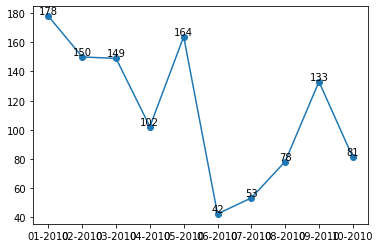

In [13]:
# Sample call to find image amount between January 2010 and October 2010
sa.chart_imagery_by_date(2010, 1, 2010, 10)